In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import missingno as msno
import pandas_profiling as prof
from dfply import *
import pulp

### Data Manipulation

We can fish out data we require for team selection from the original dataset

In [2]:
fixtures_2021_df = pd.read_csv("../data/vaastav/2020-21/fixtures.csv")

In [3]:
teams_2021_df = pd.read_csv("../data/vaastav/2020-21/teams.csv")

In [5]:
teams_2021_df.id.unique().tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [6]:
teams_2021_df.columns.tolist()

['code',
 'draw',
 'form',
 'id',
 'loss',
 'name',
 'played',
 'points',
 'position',
 'short_name',
 'strength',
 'team_division',
 'unavailable',
 'win',
 'strength_overall_home',
 'strength_overall_away',
 'strength_attack_home',
 'strength_attack_away',
 'strength_defence_home',
 'strength_defence_away',
 'pulse_id']

In [7]:
teams_2021_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,NaN,1,0,Arsenal,0,0,0,ARS,...,NaN,False,0,1200,1250,1130,1150,1220,1210,1
1,7,0,NaN,2,0,Aston Villa,0,0,0,AVL,...,NaN,False,0,1100,1160,1120,1140,1080,1100,2
2,36,0,NaN,3,0,Brighton,0,0,0,BHA,...,NaN,False,0,1130,1130,1150,1190,1100,1130,131
3,90,0,NaN,4,0,Burnley,0,0,0,BUR,...,NaN,False,0,1060,1070,1040,1090,1040,1080,43
4,8,0,NaN,5,0,Chelsea,0,0,0,CHE,...,NaN,False,0,1250,1280,1260,1300,1250,1310,4


In [8]:
team_codes = teams_2021_df[["name", "id", "code"]].to_dict(orient="records")

In [9]:
sorted(team_codes, key=lambda x: x['id'])

[{'name': 'Arsenal', 'id': 1, 'code': 3},
 {'name': 'Aston Villa', 'id': 2, 'code': 7},
 {'name': 'Brighton', 'id': 3, 'code': 36},
 {'name': 'Burnley', 'id': 4, 'code': 90},
 {'name': 'Chelsea', 'id': 5, 'code': 8},
 {'name': 'Crystal Palace', 'id': 6, 'code': 31},
 {'name': 'Everton', 'id': 7, 'code': 11},
 {'name': 'Fulham', 'id': 8, 'code': 54},
 {'name': 'Leicester', 'id': 9, 'code': 13},
 {'name': 'Leeds', 'id': 10, 'code': 2},
 {'name': 'Liverpool', 'id': 11, 'code': 14},
 {'name': 'Man City', 'id': 12, 'code': 43},
 {'name': 'Man Utd', 'id': 13, 'code': 1},
 {'name': 'Newcastle', 'id': 14, 'code': 4},
 {'name': 'Sheffield Utd', 'id': 15, 'code': 49},
 {'name': 'Southampton', 'id': 16, 'code': 20},
 {'name': 'Spurs', 'id': 17, 'code': 6},
 {'name': 'West Brom', 'id': 18, 'code': 35},
 {'name': 'West Ham', 'id': 19, 'code': 21},
 {'name': 'Wolves', 'id': 20, 'code': 39}]

In [10]:
fixtures_2021_df.loc[0, "stats"]

"[{'identifier': 'goals_scored', 'a': [{'value': 1, 'element': 4}, {'value': 1, 'element': 6}, {'value': 1, 'element': 494}], 'h': []}, {'identifier': 'assists', 'a': [{'value': 3, 'element': 478}], 'h': []}, {'identifier': 'own_goals', 'a': [], 'h': []}, {'identifier': 'penalties_saved', 'a': [], 'h': []}, {'identifier': 'penalties_missed', 'a': [], 'h': []}, {'identifier': 'yellow_cards', 'a': [{'value': 1, 'element': 4}, {'value': 1, 'element': 11}], 'h': [{'value': 1, 'element': 175}, {'value': 1, 'element': 178}]}, {'identifier': 'red_cards', 'a': [], 'h': []}, {'identifier': 'saves', 'a': [{'value': 2, 'element': 8}], 'h': [{'value': 2, 'element': 186}]}, {'identifier': 'bonus', 'a': [{'value': 3, 'element': 494}, {'value': 2, 'element': 478}, {'value': 1, 'element': 6}, {'value': 1, 'element': 8}], 'h': []}, {'identifier': 'bps', 'a': [{'value': 37, 'element': 494}, {'value': 35, 'element': 478}, {'value': 29, 'element': 6}, {'value': 29, 'element': 8}, {'value': 28, 'element': 

In [15]:
fixtures_2021_df.tail()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
375,2128661,38,True,True,374,2021-05-23T15:00:00Z,90,False,True,6,0,11,2,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,3,59271
376,2128662,38,True,True,375,2021-05-23T15:00:00Z,90,False,True,7,0,12,5,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",4,5,59272
377,2128663,38,True,True,376,2021-05-23T15:00:00Z,90,False,True,4,0,15,1,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,2,59273
378,2128664,38,True,True,377,2021-05-23T15:00:00Z,90,False,True,16,0,19,3,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,4,59274
379,2128665,38,True,True,378,2021-05-23T15:00:00Z,90,False,True,13,2,20,1,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,3,59275


In [13]:
fixtures_2021_df.team_a.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [14]:
fixtures_2021_df.team_h.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [14]:
fixtures_1920_df.event.replace({39: 30, 40: 31, 41: 32, 42: 33, 43: 34, 44: 35, 45: 36, 46: 37, 47: 38}, inplace=True)

In [16]:
def fetch_team_name(row):
    return [team["name"] for team in team_codes if team["id"] == row][0]

In [18]:
fixtures_2021_df["team_a_slug"] = fixtures_2021_df.team_a.apply(lambda x: fetch_team_name(x))
fixtures_2021_df["team_h_slug"] = fixtures_2021_df.team_h.apply(lambda x: fetch_team_name(x))

In [19]:
fixtures_2021_df.event.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])

In [20]:
fixtures_2021_df.columns

Index(['code', 'event', 'finished', 'finished_provisional', 'id',
       'kickoff_time', 'minutes', 'provisional_start_time', 'started',
       'team_a', 'team_a_score', 'team_h', 'team_h_score', 'stats',
       'team_h_difficulty', 'team_a_difficulty', 'pulse_id', 'team_a_slug',
       'team_h_slug'],
      dtype='object')

In [21]:
away_team_2021_df = fixtures_2021_df[["team_a_slug", "team_a_difficulty", "event"]]
home_team_2021_df = fixtures_2021_df[["team_h_slug", "team_h_difficulty", "event"]]

In [22]:
home_team_2021_df

,team_h_slug,team_h_difficulty,event
0,Fulham,3,1
1,Crystal Palace,2,1
2,Liverpool,3,1
3,West Ham,2,1
4,West Brom,4,1
...,...,...,...
375,Liverpool,2,38
376,Man City,4,38
377,Sheffield Utd,2,38
378,West Ham,2,38


In [23]:
away_team_2021_df

,team_a_slug,team_a_difficulty,event
0,Arsenal,2,1
1,Southampton,3,1
2,Leeds,3,1
3,Newcastle,4,1
4,Leicester,2,1
...,...,...,...
375,Crystal Palace,3,38
376,Everton,5,38
377,Burnley,2,38
378,Southampton,4,38


In [24]:
len(away_team_2021_df.team_a_slug.unique())

20

In [25]:
len(home_team_2021_df.team_h_slug.unique())

20

In [26]:
away_team_2021_df_gb = away_team_2021_df.groupby(by="team_a_slug")
home_team_2021_df_gb = home_team_2021_df.groupby(by="team_h_slug")

In [27]:
def figure_groups(team_group, team, fixture):
    group = team_group[[f"team_{fixture}_difficulty"]].transpose()
    return list(zip((f"{team}, " * 20).split(", ")[:-1], (f"{fixture}, " * 20).split(", ")[:-1], \
                    [f"gw_{event}" for event in team_group["event"].tolist()], \
                           [fdr for fdr in group.iloc[0]]))


In [28]:
fdr_by_gw_home = []

In [29]:
for team in away_team_2021_df_gb.groups.keys():
    print(f"For team: {team}")
    fdr_by_gw_home.append(figure_groups(away_team_2021_df_gb.get_group(team), team, "a"))

For team: Arsenal
For team: Aston Villa
For team: Brighton
For team: Burnley
For team: Chelsea
For team: Crystal Palace
For team: Everton
For team: Fulham
For team: Leeds
For team: Leicester
For team: Liverpool
For team: Man City
For team: Man Utd
For team: Newcastle
For team: Sheffield Utd
For team: Southampton
For team: Spurs
For team: West Brom
For team: West Ham
For team: Wolves


In [30]:
fdr_by_gw_away = []

In [31]:
for team in home_team_2021_df_gb.groups.keys():
    print(f"For team: {team}")
    fdr_by_gw_away.append(figure_groups(home_team_2021_df_gb.get_group(team), team, "h"))

For team: Arsenal
For team: Aston Villa
For team: Brighton
For team: Burnley
For team: Chelsea
For team: Crystal Palace
For team: Everton
For team: Fulham
For team: Leeds
For team: Leicester
For team: Liverpool
For team: Man City
For team: Man Utd
For team: Newcastle
For team: Sheffield Utd
For team: Southampton
For team: Spurs
For team: West Brom
For team: West Ham
For team: Wolves


In [32]:
fdr_by_gw_away[0]

[('Arsenal', 'h', 'gw_2', 4),
 ('Arsenal', 'h', 'gw_4', 2),
 ('Arsenal', 'h', 'gw_6', 4),
 ('Arsenal', 'h', 'gw_8', 2),
 ('Arsenal', 'h', 'gw_10', 2),
 ('Arsenal', 'h', 'gw_12', 2),
 ('Arsenal', 'h', 'gw_13', 2),
 ('Arsenal', 'h', 'gw_15', 4),
 ('Arsenal', 'h', 'gw_18', 2),
 ('Arsenal', 'h', 'gw_19', 2),
 ('Arsenal', 'h', 'gw_21', 4),
 ('Arsenal', 'h', 'gw_24', 3),
 ('Arsenal', 'h', 'gw_25', 4),
 ('Arsenal', 'h', 'gw_28', 3),
 ('Arsenal', 'h', 'gw_30', 4),
 ('Arsenal', 'h', 'gw_32', 2),
 ('Arsenal', 'h', 'gw_33', 4),
 ('Arsenal', 'h', 'gw_35', 2),
 ('Arsenal', 'h', 'gw_38', 3)]

In [33]:
gw_data = [sorted(fdr_by_gw_home[idx] + fdr_by_gw_away[idx], key=lambda x: x[2]) \
 for idx, team in enumerate(list(home_team_2021_df_gb.groups.keys()))]

In [34]:
gw_data_df_2021 = pd.DataFrame(sum(gw_data,[]), columns=["team", "fixture", "gw", "fdr"])

In [35]:
gw_data_df_2021.team.sort_values().unique()

array(['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Sheffield Utd',
       'Southampton', 'Spurs', 'West Brom', 'West Ham', 'Wolves'],
      dtype=object)

In [36]:
players_2021_id_df = pd.read_csv("../data/vaastav/2020-21/gws/merged_gw.csv")

In [37]:
pd.read_csv("../data/vaastav/2019-20/players_raw.csv").columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'creativity_rank',
       'creativity_rank_type', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded',
       'goals_scored', 'ict_index', 'ict_index_rank', 'ict_index_rank_type',
       'id', 'in_dreamteam', 'influence', 'influence_rank',
       'influence_rank_type', 'minutes', 'news', 'news_added', 'now_cost',
       'own_goals', 'penalties_missed', 'penalties_saved', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_number', 'status', 'team',
       'team_code', 'threat', 'threat_rank', 'threat_rank_type',
       'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_

In [38]:
player_team_df = pd.read_csv("../data/vaastav/2020-21/players_raw.csv")[["team", "team_code", "id", "first_name", "second_name", "special", "element_type"]]

In [39]:
player_team_df["element"] = player_team_df["id"]

In [40]:
player_team_df

,team,team_code,id,first_name,second_name,special,element_type,element
0,1,3,1,Mesut,Özil,False,3,1
1,1,3,2,Sokratis,Papastathopoulos,False,2,2
2,1,3,3,David,Luiz Moreira Marinho,False,2,3
3,1,3,4,Pierre-Emerick,Aubameyang,False,3,4
4,1,3,5,Cédric,Soares,False,2,5
...,...,...,...,...,...,...,...,...
708,20,39,617,Andreas,Söndergaard,False,1,617
709,20,39,626,Patrick,Cutrone,False,4,626
710,20,39,629,Nigel,Lonwijk,False,2,629
711,20,39,642,Willian José,Da Silva,False,4,642


In [41]:
player_team_df.query("element == 376")

,team,team_code,id,first_name,second_name,special,element_type,element
547,16,20,376,Jan,Bednarek,False,2,376


In [42]:
players_2021_with_team_det = pd.merge(players_2021_id_df, player_team_df, how="inner", on="element")

In [43]:
teams_df = pd.read_csv("../data/vaastav/2020-21/teams.csv")

In [44]:
teams_df

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,NaN,1,0,Arsenal,0,0,0,ARS,...,NaN,False,0,1200,1250,1130,1150,1220,1210,1
1,7,0,NaN,2,0,Aston Villa,0,0,0,AVL,...,NaN,False,0,1100,1160,1120,1140,1080,1100,2
2,36,0,NaN,3,0,Brighton,0,0,0,BHA,...,NaN,False,0,1130,1130,1150,1190,1100,1130,131
3,90,0,NaN,4,0,Burnley,0,0,0,BUR,...,NaN,False,0,1060,1070,1040,1090,1040,1080,43
4,8,0,NaN,5,0,Chelsea,0,0,0,CHE,...,NaN,False,0,1250,1280,1260,1300,1250,1310,4
5,31,0,NaN,6,0,Crystal Palace,0,0,0,CRY,...,NaN,False,0,1090,1110,1030,1120,1010,1020,6
6,11,0,NaN,7,0,Everton,0,0,0,EVE,...,NaN,False,0,1250,1130,1130,1100,1200,1140,7
7,54,0,NaN,8,0,Fulham,0,0,0,FUL,...,NaN,False,0,1090,1100,1150,1110,1040,1060,34
8,13,0,NaN,9,0,Leicester,0,0,0,LEI,...,NaN,False,0,1240,1260,1190,1150,1150,1230,26
9,2,0,NaN,10,0,Leeds,0,0,0,LEE,...,NaN,False,0,1160,1170,1060,1150,1210,1170,9


In [45]:
teams_df.columns

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

In [46]:
gw_data_df_2021["name"] = gw_data_df_2021["team"]

In [47]:
gw_data_2021_df = pd.merge(gw_data_df_2021, teams_df, how="inner", on="name")\
[["id", "team", "fixture", "gw", "fdr", "code", "pulse_id"]]

In [50]:
!mkdir -p "../models/2020-21"

In [51]:
gw_data_2021_df.to_csv("../models/2020-21/gw_data_2021.csv")

In [52]:
gw_data_2021_df

,id,team,fixture,gw,fdr,code,pulse_id
0,1,Arsenal,a,gw_1,2,3,1
1,1,Arsenal,h,gw_10,2,3,1
2,1,Arsenal,a,gw_11,4,3,1
3,1,Arsenal,h,gw_12,2,3,1
4,1,Arsenal,h,gw_13,2,3,1
...,...,...,...,...,...,...,...
755,20,Wolves,a,gw_5,3,39,38
756,20,Wolves,h,gw_6,2,39,38
757,20,Wolves,h,gw_7,2,39,38
758,20,Wolves,a,gw_8,4,39,38


In [53]:
gw_data_2021_df["gameweek"] = gw_data_2021_df.gw.apply(lambda x: int(x.split("_")[1]))

In [54]:
gw_data_2021_df.rename(columns={"team": "team_name", "id": "team"}, inplace=True)

In [55]:
gw_data_2021_df["common_id"] = gw_data_2021_df.apply(lambda x: f"{str(x['team'])}_{str(x['gameweek'])}", axis=1)

In [56]:
gw_data_2021_df.team.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [57]:
players_2021_with_team_det.rename(columns={"GW": "gameweek"}, inplace=True)

In [58]:
players_2021_with_team_det.gameweek.replace({39: 30, 40: 31, 41: 32, 42: 33, 43: 34, 44: 35, 45: 36, 46: 37, 47: 38}, inplace=True)

In [61]:
players_2021_with_team_det["common_id"] = players_2021_with_team_det.apply(lambda x: f"{str(x['team_y'])}_{str(x['gameweek'])}", axis=1)

In [63]:
players_2021_with_team_det

,name,position,team_x,xP,assists,bonus,bps,clean_sheets,creativity,element,...,yellow_cards,gameweek,team_y,team_code,id,first_name,second_name,special,element_type,common_id
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,0,1,3,36,78,Aaron,Connolly,False,4,3_1
1,Aaron Connolly,FWD,Brighton,4.0,0,2,27,1,11.3,78,...,0,2,3,36,78,Aaron,Connolly,False,4,3_2
2,Aaron Connolly,FWD,Brighton,2.7,0,0,2,0,12.1,78,...,0,3,3,36,78,Aaron,Connolly,False,4,3_3
3,Aaron Connolly,FWD,Brighton,2.7,0,0,7,0,0.3,78,...,0,4,3,36,78,Aaron,Connolly,False,4,3_4
4,Aaron Connolly,FWD,Brighton,3.0,1,0,13,0,10.3,78,...,0,5,3,36,78,Aaron,Connolly,False,4,3_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,William Fish,DEF,Man Utd,1.8,0,0,3,0,0.0,713,...,0,38,13,1,713,William,Fish,False,2,13_38
24361,Sylvester Jasper,MID,Fulham,1.8,0,0,0,0,0.0,707,...,0,38,8,54,707,Sylvester,Jasper,False,3,8_38
24362,William Osula,FWD,Sheffield Utd,1.2,0,0,0,0,0.0,711,...,0,38,15,49,711,William,Osula,False,4,15_38
24363,Tim Iroegbunam,MID,West Brom,0.8,0,0,0,0,0.0,709,...,0,38,18,35,709,Tim,Iroegbunam,False,3,18_38


In [65]:
players_2021_with_team_det.team_y.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [66]:
xp_full_2021_df = pd.merge(players_2021_with_team_det, gw_data_2021_df, how="left", on="common_id")

In [68]:
xp_full_2021_df.columns

Index(['name', 'position', 'team_x', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture_x', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'gameweek_x', 'team_y', 'team_code', 'id', 'first_name', 'second_name',
       'special', 'element_type', 'common_id', 'team', 'team_name',
       'fixture_y', 'gw', 'fdr', 'code', 'pulse_id', 'gameweek_y'],
      dtype='object')

In [69]:
position_mapper = {
    1: "GKP",
    2: "DEF",
    3: "MID",
    4: "FWD"
}

In [70]:
xp_full_2021_df["position"] = xp_full_2021_df.element_type.apply(lambda x: position_mapper.get(x))

In [71]:
xp_full_2021_df.to_csv("../models/2020-21/full_ml_training_data_2021.csv", index=False)

In [73]:
xp_full_2021_df

,name,position,team_x,xP,assists,bonus,bps,clean_sheets,creativity,element,...,element_type,common_id,team,team_name,fixture_y,gw,fdr,code,pulse_id,gameweek_y
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,4,3_1,3.0,Brighton,h,gw_1,4.0,36.0,131.0,1.0
1,Aaron Connolly,FWD,Brighton,4.0,0,2,27,1,11.3,78,...,4,3_2,3.0,Brighton,a,gw_2,2.0,36.0,131.0,2.0
2,Aaron Connolly,FWD,Brighton,2.7,0,0,2,0,12.1,78,...,4,3_3,3.0,Brighton,h,gw_3,4.0,36.0,131.0,3.0
3,Aaron Connolly,FWD,Brighton,2.7,0,0,7,0,0.3,78,...,4,3_4,3.0,Brighton,a,gw_4,3.0,36.0,131.0,4.0
4,Aaron Connolly,FWD,Brighton,3.0,1,0,13,0,10.3,78,...,4,3_5,3.0,Brighton,a,gw_5,3.0,36.0,131.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27390,William Fish,DEF,Man Utd,1.8,0,0,3,0,0.0,713,...,2,13_38,13.0,Man Utd,a,gw_38,3.0,1.0,12.0,38.0
27391,Sylvester Jasper,MID,Fulham,1.8,0,0,0,0,0.0,707,...,3,8_38,8.0,Fulham,h,gw_38,2.0,54.0,34.0,38.0
27392,William Osula,FWD,Sheffield Utd,1.2,0,0,0,0,0.0,711,...,4,15_38,15.0,Sheffield Utd,h,gw_38,2.0,49.0,18.0,38.0
27393,Tim Iroegbunam,MID,West Brom,0.8,0,0,0,0,0.0,709,...,3,18_38,18.0,West Brom,a,gw_38,3.0,35.0,36.0,38.0


### Feature Engineering

In [74]:
xp_full_2021_df.columns

Index(['name', 'position', 'team_x', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture_x', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'gameweek_x', 'team_y', 'team_code', 'id', 'first_name', 'second_name',
       'special', 'element_type', 'common_id', 'team', 'team_name',
       'fixture_y', 'gw', 'fdr', 'code', 'pulse_id', 'gameweek_y'],
      dtype='object')

In [80]:
 pd.options.mode.chained_assignment = None

unseen_data = training_data.query("gameweek_x == 38")

test_data = training_data.query("gameweek_x == 37")

training_data = training_data.query("gameweek_x not in [37, 38]")

test_data.to_csv("../models/2020-21/test.csv", index=False)

training_data.to_csv("../models/2020-21/train.csv", index=False)

unseen_data.to_csv("../models/2020-21/unseen.csv", index=False)

### Baseline model

In [93]:
training_data.columns

Index(['element', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       ...
       'transfers_out_in_prev_3', 'transfers_out_in_prev_5',
       'transfers_out_in_prev_10', 'total_points_in_prev_1',
       'total_points_in_prev_3', 'total_points_in_prev_5',
       'total_points_in_prev_10', 'fdr_in_prev_1', 'fdr_in_prev_2',
       'fdr_in_prev_3'],
      dtype='object', length=103)

In [94]:
columns_drop = ["transfers_balance", "element", "total_points_cumulative", "total_points", "gameweek_x", \
               "total_points_in_prev_1", "total_points_in_prev_3", "total_points_in_prev_5", \
               "total_points_in_prev_10", "fdr_in_prev_1", "fdr_in_prev_2", "fdr_in_prev_3"] + lag_variables


In [95]:
X_train = training_data.drop(labels=columns_drop, axis=1)
y_train = training_data[["total_points"]]

training_data.shape, X_train.shape, y_train.shape

X_valid = test_data.drop(labels=columns_drop, axis=1)
y_valid = test_data[["total_points"]]

X_valid.shape, y_valid.shape

X_train.fillna(value=0, inplace=True)

msno.bar(X_train)

X_valid.fillna(value=0, inplace=True)

msno.bar(X_valid)

msno.bar(y_valid)

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

%time model.fit(X_train, y_train)

model.intercept_, model.coef_

list(zip(X_train.columns.tolist(), list(model.coef_[0])))

%time predictions = model.predict(X_valid)

def predictions(original_df, input_df, output_df, model, player_info):
    predictions = model.predict(input_df)
    predictions = [round(pred[0], ndigits=3) for pred in predictions]
    actual_results = output_df.total_points.tolist()
    comparison_df = pd.DataFrame(zip(predictions, actual_results), \
                                     columns=["model_predictions", "actual_results"])
    comparison_df["element"] = original_df[original_df.index.isin(output_df.index.tolist())]["element"].tolist()
    return pd.merge(player_info, comparison_df, how="inner", on="element").\
        drop_duplicates().sort_values(by="model_predictions", ascending=False)

predictions = [round(pred[0], ndigits=3) for pred in predictions]

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions))
print('RSquared value:', metrics.r2_score(y_valid, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

actual_results = y_valid.total_points.tolist()
comparison_df = pd.DataFrame(zip(predictions, actual_results), \
                                 columns=["model_predictions", "actual_results"])

comparison_df.sort_values(by=["actual_results"], ascending=False)

comparison_df.shape

plt.figure(figsize=(16, 10))

#### Learn more here: [link](https://stats.stackexchange.com/questions/104622/what-does-an-actual-vs-fitted-graph-tell-us)

player_general_info_1920_df = xp_full_2021_df[["first_name", "second_name", "position", "team_name", "element"]]

player_general_info_1920_df.to_csv("../models/2020-21/player_info_2021.csv")

plt.scatter(comparison_df.actual_results, comparison_df.model_predictions)
plt.xlabel("Ground Truth")
plt.ylabel("Model prediction")
plt.xticks(np.arange(-5, 20, 2))
plt.yticks(np.arange(-5, 20, 2))
plt.show()

comparison_df["element"] = test_data[test_data.index.isin(y_valid.index.tolist())]["element"].tolist()

comparison_df.shape

final_predictions_df = pd.merge(player_general_info_1920_df, comparison_df, how="inner", on="element").\
drop_duplicates().sort_values(by="model_predictions", ascending=False)

final_predictions_df.query("position == 'GKP'")

final_predictions_df.query("position == 'DEF'")

final_predictions_df.query("position == 'MID'")

final_predictions_df.sort_values(by=["actual_results"], ascending=False).query("position == 'FWD'").head(10)

### Predictions on unseen dataset

X_test = unseen_data.drop(labels=columns_drop, axis=1)
y_test = unseen_data[["total_points"]]

X_test.fillna(0, inplace=True)

msno.bar(X_test)

msno.bar(y_test)

%time predictions = model.predict(X_test)

predictions_2021 = predictions(original_df=unseen_data, \
            input_df=X_test, output_df=y_test, model=model, player_info=player_general_info_1920_df)

predictions_2021.to_csv("../models/2020-21/gw38_predictions_2021.csv")

import pickle
with open("../models/2020-21/xP_baseline_2021_v1.pkl", "wb") as file:
    pickle.dump(model, file)

### Clean up 2020-21 FPL dataset

In [146]:
players_1920 = pd.read_csv("../models/2019-20/player_info_2021.csv")

In [147]:
players_2021 = pd.read_csv("../models/2020-21/player_info_2021.csv")

In [372]:
def data_pipeline(input_df):
    training_data = input_df[["full_name", "season", "team_name", "assists", "bonus", "bps", "clean_sheets", \
                              "creativity", "gw", "position", \
                              "goals_conceded", "goals_scored", "ict_index", "influence", "minutes", \
                              "own_goals", "penalties_missed", "penalties_saved", "red_cards", \
                              "saves", "selected", "threat", "transfers_balance", "transfers_in", \
                              "transfers_out", "value", "was_home", "yellow_cards", "gameweek_x", "fdr", \
                              "total_points"]]
    training_data.sort_values(by=["full_name", "season", "gameweek_x"], inplace=True)
    lag_variables = ["assists", "bonus", "bps", "clean_sheets", "goals_conceded", "goals_scored", "minutes", \
                "own_goals", "penalties_missed", "penalties_saved", "red_cards", "yellow_cards", "saves", \
                "selected", "threat", "transfers_in", "transfers_out", "total_points"]
    for var in lag_variables:
        for window in [1, 3, 5, 10]:
            new_var = f"{var}_in_prev_{window}"
            print(f"Adding new column:{new_var}")
            training_data[new_var] = create_lag_variable_list(training_data, var, window)
    return training_data

In [232]:
def create_lag_variable_list(dataframe, var, lag_window):
    return dataframe.groupby(by=["full_name"])[var].rolling(lag_window).sum().tolist()

In [169]:
players_2021.drop(labels=["Unnamed: 0"], axis=1, inplace=True)

In [170]:
players_1920["full_name"] = players_1920["first_name"] + "_" + players_1920["second_name"]
players_2021["full_name"] = players_2021["first_name"] + "_" + players_2021["second_name"]

In [177]:
players_2021["season"] = "2021"
players_1920["season"] = "1920"

In [181]:
len(players_1920.drop_duplicates().element.unique())

666

In [182]:
len(players_2021.drop_duplicates().element.unique())

713

In [183]:
players_2021.drop_duplicates()

,first_name,second_name,position,team_name,element,full_name,season
0,Aaron,Connolly,FWD,Brighton,78,Aaron_Connolly,2021
38,Aaron,Cresswell,DEF,West Ham,435,Aaron_Cresswell,2021
78,Aaron,Mooy,MID,Brighton,60,Aaron_Mooy,2021
116,Aaron,Ramsdale,GKP,Sheffield Utd,483,Aaron_Ramsdale,2021
156,Abdoulaye,Doucouré,MID,Everton,512,Abdoulaye_Doucouré,2021
...,...,...,...,...,...,...,...
27390,William,Fish,DEF,Man Utd,713,William_Fish,2021
27391,Sylvester,Jasper,MID,Fulham,707,Sylvester_Jasper,2021
27392,William,Osula,FWD,Sheffield Utd,711,William_Osula,2021
27393,Tim,Iroegbunam,MID,West Brom,709,Tim_Iroegbunam,2021


In [187]:
players_1920["unique_id"] = players_1920.apply(lambda x: f"{str(x['season'])}_{str(x['element'])}_{str(x['team_name'])}", axis=1)
players_2021["unique_id"] = players_2021.apply(lambda x: f"{str(x['season'])}_{str(x['element'])}_{str(x['team_name'])}", axis=1)

In [190]:
players_1920.drop_duplicates(inplace=True)

In [191]:
players_2021.drop_duplicates(inplace=True)

In [339]:
combined_players = players_1920.append(players_2021, ignore_index=True)

In [340]:
combined_players.to_csv("../models/player_info_1920_2021.csv", index=False)

In [248]:
gw_data_1920 = pd.read_csv("../models/2019-20/full_ml_training_data_1920.csv")

In [249]:
gw_data_2021 = pd.read_csv("../models/2020-21/full_ml_training_data_2021.csv")

In [270]:
gw_data_1920["full_name"] = gw_data_1920.name.apply(lambda x: " ".join(x.split("_")[:2]))

In [271]:
gw_data_2021["full_name"] = gw_data_2021.name.apply(lambda x: "_".join(x.split("_")))

In [272]:
gw_data_1920["season"] = "1920"
gw_data_2021["season"] = "2021"

In [273]:
gw_data_1920["unique_id"] = gw_data_1920.apply(lambda x: f"{str(x['season'])}_{str(x['element'])}_{str(x['team_name'])}", axis=1)
gw_data_2021["unique_id"] = gw_data_2021.apply(lambda x: f"{str(x['season'])}_{str(x['element'])}_{str(x['team_name'])}", axis=1)

In [274]:
gw_data_1920 = gw_data_1920.drop_duplicates(subset=["element", "gameweek_x", "season"], keep='first')
gw_data_2021 = gw_data_2021.drop_duplicates(subset=["element", "gameweek_x", "season"], keep='first')

In [275]:
gw_data_1920.shape, gw_data_2021.shape

((22313, 52), (22889, 55))

In [278]:
full_gw_dataset = gw_data_1920.append(gw_data_2021, ignore_index=True)

In [281]:
full_gw_dataset.shape

(45202, 55)

In [376]:
full_gw_dataset.to_csv("../models/full_gw_dataset_1920_2021.csv", index=False)

In [373]:
feature_engg_gw_df = data_pipeline(full_gw_dataset)

Adding new column:assists_in_prev_1
Adding new column:assists_in_prev_3
Adding new column:assists_in_prev_5
Adding new column:assists_in_prev_10
Adding new column:bonus_in_prev_1
Adding new column:bonus_in_prev_3
Adding new column:bonus_in_prev_5
Adding new column:bonus_in_prev_10
Adding new column:bps_in_prev_1
Adding new column:bps_in_prev_3
Adding new column:bps_in_prev_5
Adding new column:bps_in_prev_10
Adding new column:clean_sheets_in_prev_1
Adding new column:clean_sheets_in_prev_3
Adding new column:clean_sheets_in_prev_5
Adding new column:clean_sheets_in_prev_10
Adding new column:goals_conceded_in_prev_1
Adding new column:goals_conceded_in_prev_3
Adding new column:goals_conceded_in_prev_5
Adding new column:goals_conceded_in_prev_10
Adding new column:goals_scored_in_prev_1
Adding new column:goals_scored_in_prev_3
Adding new column:goals_scored_in_prev_5
Adding new column:goals_scored_in_prev_10
Adding new column:minutes_in_prev_1
Adding new column:minutes_in_prev_3
Adding new col

In [308]:
unseen_data = feature_engg_gw_df.query("gameweek_x == 38 and season == '2021'")

test_data = feature_engg_gw_df.query("gameweek_x == 37 and season == '2021'")

In [309]:
unseen_data.shape, test_data.shape, training_data.shape

((713, 100), (706, 100), (43783, 100))

In [310]:
remove_idx = unseen_data.index.tolist() + test_data.index.tolist()

In [311]:
training_data = feature_engg_gw_df[~feature_engg_gw_df.index.isin(remove_idx)].copy(deep=True)

In [312]:
lag_variables

['assists',
 'bonus',
 'bps',
 'clean_sheets',
 'goals_conceded',
 'goals_scored',
 'minutes',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'yellow_cards',
 'saves',
 'selected',
 'threat',
 'transfers_in',
 'transfers_out',
 'total_points']

In [317]:
training_data.columns

Index(['full_name', 'season', 'assists', 'bonus', 'bps', 'clean_sheets',
       'creativity', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'minutes', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'selected', 'threat',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'gameweek_x', 'fdr', 'total_points',
       'assists_in_prev_1', 'assists_in_prev_3', 'assists_in_prev_5',
       'assists_in_prev_10', 'bonus_in_prev_1', 'bonus_in_prev_3',
       'bonus_in_prev_5', 'bonus_in_prev_10', 'bps_in_prev_1', 'bps_in_prev_3',
       'bps_in_prev_5', 'bps_in_prev_10', 'clean_sheets_in_prev_1',
       'clean_sheets_in_prev_3', 'clean_sheets_in_prev_5',
       'clean_sheets_in_prev_10', 'goals_conceded_in_prev_1',
       'goals_conceded_in_prev_3', 'goals_conceded_in_prev_5',
       'goals_conceded_in_prev_10', 'goals_scored_in_prev_1',
       'goals_scored_in_prev_3', 'goals_scored_in_pr

In [318]:
columns_drop = ["transfers_balance", "full_name", "season", "total_points", "gameweek_x", \
               "total_points_in_prev_1", "total_points_in_prev_3", "total_points_in_prev_5", \
               "total_points_in_prev_10"] + lag_variables

In [319]:
def split_train_valid_test(train_df, valid_df, test_df, columns_drop):
    X_train = train_df.drop(labels=columns_drop, axis=1)
    y_train = train_df[["total_points"]]

    X_valid = valid_df.drop(labels=columns_drop, axis=1)
    y_valid = valid_df[["total_points"]]
    
    X_test = test_df.drop(labels=columns_drop, axis=1)
    y_test = test_df[["total_points"]]

    X_test.fillna(0, inplace=True)
    X_valid.fillna(0, inplace=True)
    X_train.fillna(0, inplace=True)
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test


X_train, y_train, X_valid, y_valid, X_test, y_test = split_train_valid_test(train_df=training_data,\
                                                                           valid_df=test_data,\
                                                                           test_df=unseen_data,\
                                                                           columns_drop=columns_drop)

In [321]:
from sklearn.linear_model import LinearRegression

def model_fit(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    return model

baseline_model = model_fit(X_train, y_train)
print(model.intercept_, model.coef_)
print("============================================================")
print("Model co-efficients")
print(list(zip(X_train.columns.tolist(), list(model.coef_[0]))))

[-0.04156397] [[ 1.08661498e-01 -1.19656110e+00  9.26085713e-02  2.06577186e-03
  -1.54351466e-03 -5.65898816e-04  2.25879244e+00  2.47335451e-03
  -1.02894719e-02  8.92656553e-03  1.08510152e+00 -2.63847482e-02
   8.61110814e-03  7.09260854e-04  1.03077961e-01  1.34620104e-03
  -2.01515280e-04  3.90241290e-04  1.47289410e+00 -1.31330711e-02
   2.43962532e-03  9.57615053e-03 -2.44116290e-01  5.21521845e-03
  -1.13522921e-03  2.24885389e-03  3.45300738e+00  1.22867276e-02
  -5.32102597e-02 -1.23069350e-02  1.55544290e-02 -5.58317349e-05
   1.35377591e-04 -1.21698942e-04 -1.82124666e+00  1.93430434e-02
   9.43216753e-04 -1.14805553e-02 -9.96135831e-01  2.57916617e-01
   3.93750636e-02 -1.75381222e-01  3.82134737e+00  1.30260871e-01
  -4.47755206e-02 -5.58533091e-02 -1.93191197e+00 -3.03117478e-02
  -5.01782886e-02  1.53804460e-02 -6.23467724e-01 -1.43098441e-02
  -7.23263457e-03 -5.04517681e-03  2.18448016e-01 -1.10051838e-02
  -9.55990758e-04 -2.52049416e-03  9.71509172e-08 -8.57999333e

In [359]:
feature_engg_gw_df[["full_name", "gameweek_x", "season", ""]]

Index(['full_name', 'season', 'assists', 'bonus', 'bps', 'clean_sheets',
       'creativity', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'minutes', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'selected', 'threat',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'gameweek_x', 'fdr', 'total_points',
       'assists_in_prev_1', 'assists_in_prev_3', 'assists_in_prev_5',
       'assists_in_prev_10', 'bonus_in_prev_1', 'bonus_in_prev_3',
       'bonus_in_prev_5', 'bonus_in_prev_10', 'bps_in_prev_1', 'bps_in_prev_3',
       'bps_in_prev_5', 'bps_in_prev_10', 'clean_sheets_in_prev_1',
       'clean_sheets_in_prev_3', 'clean_sheets_in_prev_5',
       'clean_sheets_in_prev_10', 'goals_conceded_in_prev_1',
       'goals_conceded_in_prev_3', 'goals_conceded_in_prev_5',
       'goals_conceded_in_prev_10', 'goals_scored_in_prev_1',
       'goals_scored_in_prev_3', 'goals_scored_in_pr

In [344]:
combined_players = combined_players.drop_duplicates(subset=["full_name", "season"])

In [374]:
def generate_predictions(original_df, input_df, output_df, model, player_info):
    predictions = model.predict(input_df)
    predictions = [round(pred[0], ndigits=3) for pred in predictions]
    actual_results = output_df.total_points.tolist()
    comparison_df = pd.DataFrame(zip(predictions, actual_results), \
                                     columns=["model_predictions", "actual_results"])
    comparison_df["full_name"] = original_df[original_df.index.isin(output_df.index.tolist())]["full_name"].tolist()
    comparison_df["season"] = original_df[original_df.index.isin(output_df.index.tolist())]["season"].tolist()
    comparison_df["gw"] = original_df[original_df.index.isin(output_df.index.tolist())]["gw"].tolist()
    comparison_df["team_name"] = original_df[original_df.index.isin(output_df.index.tolist())]["team_name"].tolist()
    comparison_df["position"] = original_df[original_df.index.isin(output_df.index.tolist())]["position"].tolist()
    return comparison_df

predictions = generate_predictions(original_df=feature_engg_gw_df,\
                                  input_df=X_valid, \
                                  output_df=y_valid, \
                                  model=baseline_model, \
                                  player_info=combined_players)

In [375]:
predictions

,model_predictions,actual_results,full_name,season,gw,team_name,position
0,0.079,0,Aaron Connolly,2021,gw_37,Brighton,FWD
1,4.589,5,Aaron Cresswell,2021,gw_37,West Ham,DEF
2,0.072,0,Aaron Mooy,2021,gw_37,Brighton,MID
3,2.827,3,Aaron Ramsdale,2021,gw_37,Sheffield Utd,GKP
4,2.072,2,Aaron Wan-Bissaka,2021,gw_37,Man Utd,DEF
...,...,...,...,...,...,...,...
701,0.056,0,Zack Steffen,2021,gw_37,Man City,GKP
702,0.054,0,Zak Brunt,2021,gw_37,Sheffield Utd,MID
703,0.058,0,Zeze Steven Sessegnon,2021,gw_37,Fulham,DEF
704,1.964,1,Çaglar Söyüncü,2021,gw_37,Leicester,DEF


In [377]:
unseen_predictions = generate_predictions(original_df=feature_engg_gw_df,\
                                  input_df=X_test, \
                                  output_df=y_test, \
                                  model=baseline_model, \
                                  player_info=combined_players)

In [378]:
unseen_predictions

,model_predictions,actual_results,full_name,season,gw,team_name,position
0,0.504,1,Aaron Connolly,2021,gw_38,Brighton,FWD
1,5.130,6,Aaron Cresswell,2021,gw_38,West Ham,DEF
2,0.070,0,Aaron Mooy,2021,gw_38,Brighton,MID
3,7.867,9,Aaron Ramsdale,2021,gw_38,Sheffield Utd,GKP
4,0.124,0,Aaron Wan-Bissaka,2021,gw_38,Man Utd,DEF
...,...,...,...,...,...,...,...
708,0.062,0,Zack Steffen,2021,gw_38,Man City,GKP
709,0.056,0,Zak Brunt,2021,gw_38,Sheffield Utd,MID
710,0.053,0,Zeze Steven Sessegnon,2021,gw_38,Fulham,DEF
711,1.574,0,Çaglar Söyüncü,2021,gw_38,Leicester,DEF


In [379]:
import pickle
with open("../models/combined_model_v1.pkl", "wb") as file:
    pickle.dump(baseline_model, file)

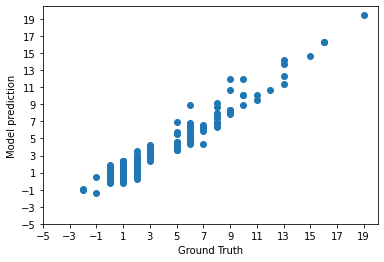

In [380]:
plt.scatter(unseen_predictions.actual_results, unseen_predictions.model_predictions)
plt.xlabel("Ground Truth")
plt.ylabel("Model prediction")
plt.xticks(np.arange(-5, 20, 2))
plt.yticks(np.arange(-5, 20, 2))
plt.show()

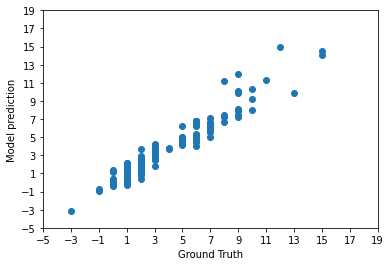

In [381]:
plt.scatter(predictions.actual_results, predictions.model_predictions)
plt.xlabel("Ground Truth")
plt.ylabel("Model prediction")
plt.xticks(np.arange(-5, 20, 2))
plt.yticks(np.arange(-5, 20, 2))
plt.show()

In [382]:
def get_metrics(output_df):
    from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(output_df.actual_results, output_df.model_predictions))
    print('RSquared value:', metrics.r2_score(output_df.actual_results, output_df.model_predictions))
    print('Mean Squared Error:', metrics.mean_squared_error(output_df.actual_results, output_df.model_predictions))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_df.actual_results, output_df.model_predictions)))

In [383]:
get_metrics(unseen_predictions)

Mean Absolute Error: 0.3097727910238429
RSquared value: 0.9568624898951241
Mean Squared Error: 0.2780380364656382
Root Mean Squared Error: 0.5272931219593502


In [384]:
get_metrics(predictions)

Mean Absolute Error: 0.26556515580736545
RSquared value: 0.9528657433294496
Mean Squared Error: 0.228877783286119
Root Mean Squared Error: 0.47841172987931535


### Build dataset for Season 2021-22 GW-1

In [385]:
!wget https://fantasy.premierleague.com/api/bootstrap-static/ -O season_2021_22_gw_1.json

--2021-08-08 21:23:57--  https://fantasy.premierleague.com/api/bootstrap-static/
Resolving fantasy.premierleague.com (fantasy.premierleague.com)... 151.101.154.133
Connecting to fantasy.premierleague.com (fantasy.premierleague.com)|151.101.154.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 692963 (677K) [application/json]
Saving to: ‘season_2021_22_gw_1.json’

season_2021_22_gw_1 100%[===================>] 676.72K  --.-KB/s    in 0.08s   

2021-08-08 21:23:58 (7.78 MB/s) - ‘season_2021_22_gw_1.json’ saved [692963/692963]



In [386]:
import json

In [387]:
with open("./season_2021_22_gw_1.json", "r") as file:
    gw_1 = json.load(file)